In [22]:
import numpy
# import matplotlib
from scipy import signal
import scipy.fftpack
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt 
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
data=np.loadtxt('Winter_2010.txt')

In [24]:
y=zeros(128)
fof2=data[:]

print fof2

[ 3.02  3.96  3.34  3.34  3.57  3.76  3.76  3.43  3.63  3.7   3.58  3.59
  3.91  4.38  3.58  3.64  3.58  3.21  3.13  3.25  3.25  3.33  3.58  3.63
  3.3   3.23  3.66  3.59  3.63  3.56  3.47  3.5   3.46  3.41  3.36  3.45
  3.33  3.26  3.28  3.5   3.22  3.42  3.71  3.87  3.7   3.53  3.59  3.34
  3.48  3.27  3.64  3.45  3.45  3.75  3.65  3.62  3.49  3.46  3.52  3.27
  3.88  3.51  3.47  3.43  3.64  3.48  3.72  3.83  3.57  3.82  3.74  4.34
  4.52  4.4   4.42  4.43  5.02  3.64  4.48  4.63  3.98  4.8   4.42  4.54
  4.43  4.68  4.41  4.73  4.74  4.54]


In [25]:
N=len(fof2)
y[:N]=fof2[:N]-mean(fof2[:N])
t=arange(N)
#print y
#print sum(fof2)
#print N

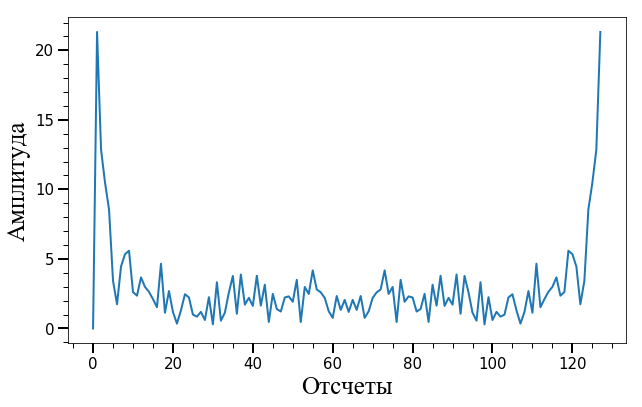

In [35]:
xminorLocator = MultipleLocator(5)
yminorLocator = MultipleLocator(1)
fig, ax = plt.subplots()
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
#xlim(0,85,5)
#ylim(0,width.max(),1)
plt.xlabel(u'Отсчеты', {'fontname':'Times New Roman'},size=25, color='black') #подпись осей
plt.ylabel(u'Амплитуда',  {'fontname':'Times New Roman'},size=25, color='black')
rcParams['figure.figsize'] = (10, 6) #размер картинки
rcParams['lines.linewidth'] = 2 #ширина линии
rcParams['font.size']= 15 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
Y=scipy.fftpack.fft(y)
plot(abs(Y))
#print Y

0.0


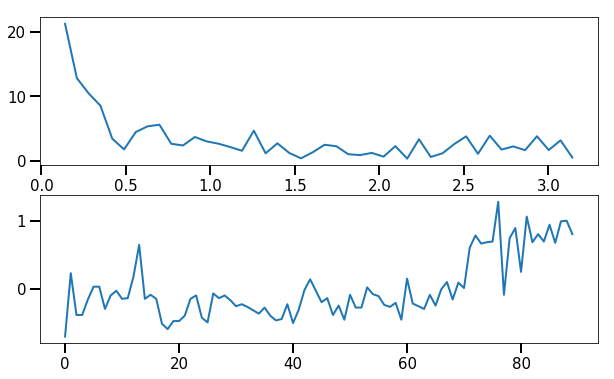

In [27]:
dt=1
Fmax=pi/dt
Fmin=2*pi/N
fr=arange(Fmin,Fmax+Fmin,Fmin)
subplot(211)
plot(fr[1:],abs(Y[1:N/2]))
subplot(2,1,2)
plot(t,y[:N]) 
print(abs(Y[0]))

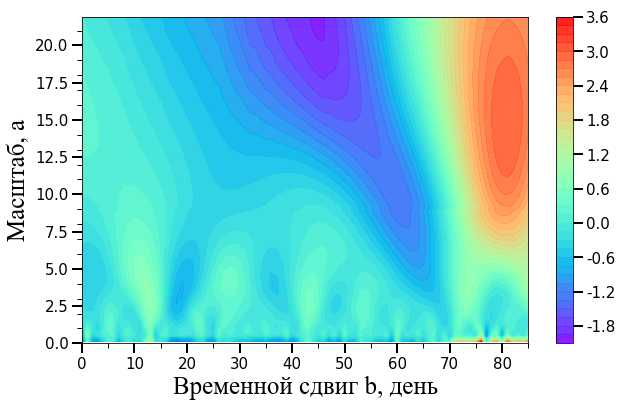

In [34]:
#majorLocator = MultipleLocator(20)
#majorFormatter = FormatStrFormatter('%d')
xminorLocator = MultipleLocator(5)
yminorLocator = MultipleLocator(1)
width=arange(0.1,N/4,0.2)
wmatr=signal.cwt(y[:N],signal.ricker,width)
fig,ax = plt.subplots()

#contourf(wmatr)
contourf(arange(N),width,wmatr, 40, cmap=cm.rainbow,alpha=0.9)
colorbar(format='%.1f')
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
xlim(0,85,5)
ylim(0,width.max(),1)
plt.xlabel(u'Временной сдвиг b, день', {'fontname':'Times New Roman'},size=25, color='black') #подпись осей
plt.ylabel(u'Масштаб, a', {'fontname':'Times New Roman'},size=25, color='black')
rcParams['figure.figsize'] = (10, 6) #размер картинки
rcParams['lines.linewidth'] = 2 #ширина линии
rcParams['font.size']= 15 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
#plt.tight_layout() # автоматическое выравнивание элементов на холсте plt
#savefig('Wavelet_2010.png',dpi=1200)
